In [1]:
import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import itertools  

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [7]:
path = "mnistasjpg/trainingSet/"
train_data_path = path+"trainingSet"
# test_data_path = path+"test"
# valid_data_path = path+"valid"

In [8]:
img_rows = 28
img_cols = 28
batch_size = 50

In [29]:
#Image Generator
#Image Generator
# train_datagen = ImageDataGenerator(rescale=1. / 255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')
train_datagen = ImageDataGenerator(zoom_range=0.5)
# train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

# valid_datagen = ImageDataGenerator()
# valid_generator = valid_datagen.flow_from_directory(valid_data_path,
#                                                     target_size=(img_rows, img_cols),
#                                                     batch_size=batch_size,
#                                                     class_mode='categorical', shuffle=True)

# test_datagen = ImageDataGenerator()
# test_generator = test_datagen.flow_from_directory(test_data_path,
#                                                     target_size=(img_rows, img_cols),
#                                                     batch_size=batch_size,
#                                                     class_mode='categorical', shuffle=False)

Found 42000 images belonging to 10 classes.


In [30]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(24,24), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     print(cols, rows)
    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [31]:
imgs, labels = next(train_generator)


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


/home/amar/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


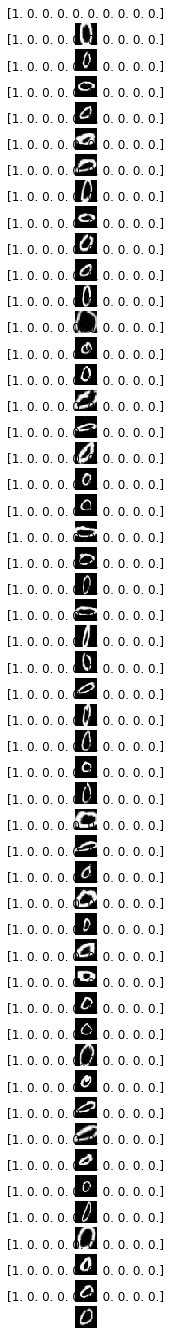

In [32]:
print(train_generator.class_indices)
plots(imgs, titles=labels)

In [33]:
model = Sequential([Conv2D(6, (3, 3), activation='relu', 
                           input_shape=(img_rows, img_cols, 3)), 
                    Flatten(), 
                    Dense(10, activation='softmax')
                   ])


In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
history = model.fit_generator(train_generator, steps_per_epoch=20, epochs=55)

Epoch 1/55
20/20 [==============================] - 1s 37ms/step - loss: 0.9877 - accuracy: 0.8020
Epoch 2/55
20/20 [==============================] - 1s 35ms/step - loss: 0.7585 - accuracy: 0.8170
Epoch 3/55
20/20 [==============================] - 1s 34ms/step - loss: 0.8925 - accuracy: 0.8090
Epoch 4/55
20/20 [==============================] - 1s 34ms/step - loss: 0.8172 - accuracy: 0.8170
Epoch 5/55
20/20 [==============================] - 1s 33ms/step - loss: 0.8439 - accuracy: 0.8080
Epoch 6/55
20/20 [==============================] - 1s 34ms/step - loss: 0.5937 - accuracy: 0.8560
Epoch 7/55
20/20 [==============================] - 1s 34ms/step - loss: 0.7898 - accuracy: 0.8300
Epoch 8/55
20/20 [==============================] - 1s 35ms/step - loss: 0.6421 - accuracy: 0.8450
Epoch 9/55
20/20 [==============================] - 1s 33ms/step - loss: 0.7035 - accuracy: 0.8280
Epoch 10/55
20/20 [==============================] - 1s 34ms/step - loss: 0.7736 - accuracy: 0.8240
Epoch 11/

In [40]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

Confusion Matrix
Confusion matrix, without normalization


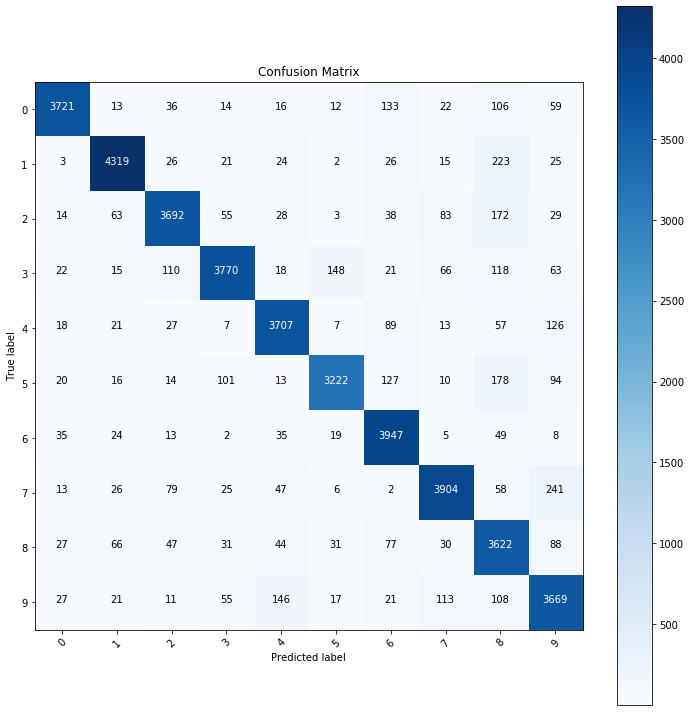

In [42]:
#Confusion Matrix and Classification Report
Y_pred = model.predict_generator(train_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(train_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')